<a href="https://colab.research.google.com/github/rosiekwon/smart_healthcare/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 비지도학습
- 정답 데이터가 주어지지 않는 머신러닝 방법
- 알고리즘에 따라 군집화시켜주는 방법
- 대표적으로 k-mean clustering

PCA(Principal Component Analysis)
- 차원 축소 방법 중 하나
- 데이터의 특성을 설명하고 모델에 학습시키기 위해 많은 수의 feature들이 생성되는데 이러한 feature들을 감소시킬 수 있다

Covariance = 2개의 변수가 함께 변하는 정도를 측정하는 척도

- 고유벡터(eigen vector) - 어떤 선형 변환이 일어난 후에도 그 방향이 변하지 않는 영벡터가 아닌 벡터
- 고유 값(eigen value) - 변환 후에 고유벡터의 크기가 변하는 비율
- 고유 공간(eigen space) - 같은 고유 값을 갖는 고유벡터들의 집합

공분산 행력의 고유벡터 ; 데이터가 어떤 방향으로 분산되어있는지 표현해준다

<img src = "https://raw.githubusercontent.com/angeloyeo/angeloyeo.github.io/master/pics/2019-07-27_PCA/pics_eigen.png" height = 300 width = 300>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = 5*np.random.randn(500)
y = 2*np.random.randn(500)
feature = np.zeros((500,2))
feature[:,0]=x
feature[:,1]=y

num_data = np.size(feature,0)
num_feature = np.size(feature,1)
print(f'number of data: {num_data}')
print(f'number of feature: {num_feature}')

number of data: 500
number of feature: 2


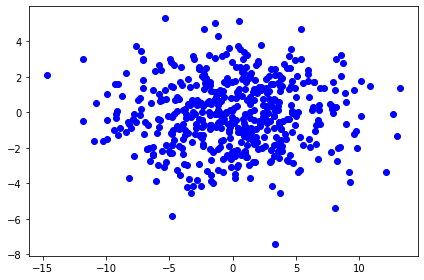

In [18]:
plt.scatter(x,y,color='blue')
plt.tight_layout()

In [4]:
cluster_k =2
iteration =10
loss = np.zeros(iteration)
center_iteration = np.zeros((iteration, cluster_k, num_feature))
label_pred = np.random.randint(0,cluster_k,size=(num_data))
distance = np.zeros((num_data,cluster_k))

In [5]:
center = np.zeros(shape=(cluster_k,num_feature))
cluster_1 = feature[np.where(label_pred ==0)]
center[0] = np.sum(cluster_1, axis=0)/len(cluster_1)

cluster_2 = feature[np.where(label_pred ==1)]
center[1] = np.sum(cluster_2, axis=0)/len(cluster_2)

center

array([[ 0.33632533, -0.02361488],
       [-0.45903558, -0.22179048]])

compute distance

In [6]:
loss_1 = np.sum((feature-center[0])**2,1)
loss_2 = np.sum((feature-center[1])**2,1)
loss_1.shape, loss_2.shape

((500,), (500,))

In [7]:
distance = np.zeros(shape=(num_data, cluster_k))
distance[:,0] = loss_1
distance[:,1] = loss_2

label_assign

In [8]:
label_pred = np.argmin(distance,axis=1)
label_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,

iteration

In [9]:
center = np.zeros(shape=(cluster_k, num_feature))
temp_center = np.zeros(shape=(cluster_k,num_feature))
distance = np.zeros(shape=(num_data,cluster_k))

for i in range(iteration):
  for j in range(cluster_k):
    cluster=feature[np.where(label_pred==j)]
    center[j]= np.sum(cluster,axis=0)/ len(cluster)
    distance[:,j] = np.sum((feature-center[j])**2, axis=1)

  
  label_pred = np.argmin(distance,axis=1)

  loss[i] = np.sum(distance[range(num_data), label_pred])/num_data
  center_iteration[i]=center

In [12]:
loss

array([11.73257929, 11.70972268, 11.70838589, 11.70838589, 11.70838589,
       11.70838589, 11.70838589, 11.70838589, 11.70838589, 11.70838589])

In [11]:
center_iteration

array([[[ 3.59655823,  0.09968644],
        [-3.83822502, -0.35232396]],

       [[ 3.54208701, -0.0208134 ],
        [-3.93393402, -0.23220194]],

       [[ 3.5289277 , -0.05323954],
        [-3.95082819, -0.19795441]],

       [[ 3.5289277 , -0.05323954],
        [-3.95082819, -0.19795441]],

       [[ 3.5289277 , -0.05323954],
        [-3.95082819, -0.19795441]],

       [[ 3.5289277 , -0.05323954],
        [-3.95082819, -0.19795441]],

       [[ 3.5289277 , -0.05323954],
        [-3.95082819, -0.19795441]],

       [[ 3.5289277 , -0.05323954],
        [-3.95082819, -0.19795441]],

       [[ 3.5289277 , -0.05323954],
        [-3.95082819, -0.19795441]],

       [[ 3.5289277 , -0.05323954],
        [-3.95082819, -0.19795441]]])

Text(0, 0.5, 'loss')

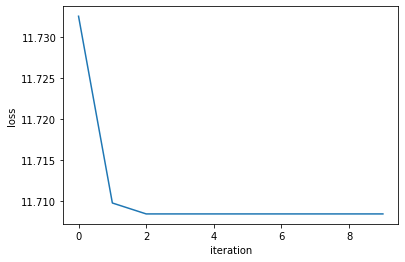

In [13]:
plt.plot(loss)
plt.xlabel('iteration')
plt.ylabel('loss')

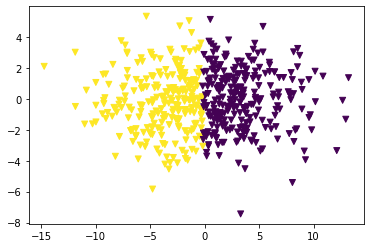

In [17]:
plt.scatter(feature[:,0],feature[:,1],marker='v',c=label_pred)
plt.show()

scikit library 활용한 k-means clustering

In [19]:
from sklearn.cluster import KMeans

In [21]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(feature)

KMeans(n_clusters=5)

In [22]:
label_sklearn = kmeans.predict(feature)

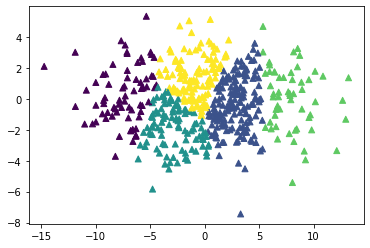

In [26]:
plt.scatter(feature[:,0],feature[:,1],marker='^',c=label_sklearn)